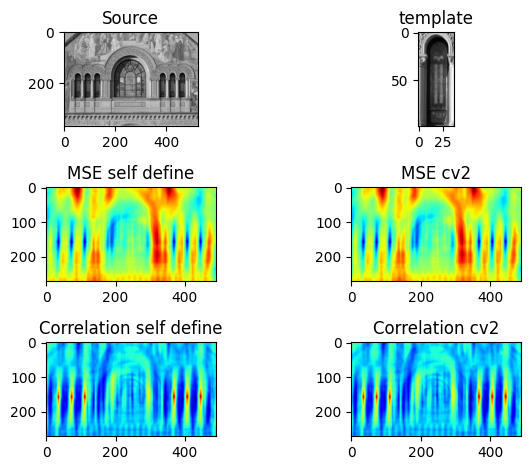

In [57]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("s.png", cv2.IMREAD_GRAYSCALE)
temp = img[158:257, 35:72]

# MSE
def template_matching_mse(s, t):
    m = np.zeros([s.shape[0] - t.shape[0] + 1, s.shape[1] - t.shape[1] +1], np.float32)
    th, tw = t.shape[0], t.shape[1]
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            s_ = s[i:i+th, j:j+ tw].astype(np.float32)
            m[i][j] = np.sum((s_ - t)**2)
    return m

def template_matching_correlation(s, t):
    m = np.zeros([s.shape[0] - t.shape[0] + 1, s.shape[1] - t.shape[1] +1], np.float32)
    th, tw = t.shape[0], t.shape[1]
    t_mean = t.mean()
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            s_ = s[i:i+th, j:j+ tw].astype(np.float32)
            m[i][j] = np.sum((s_ - s.mean()) * (t - t_mean))
    return m

plt.figure("demo")
r, n = 3, 2

plt.subplot(r, n, 1)
plt.imshow(img, cmap='gray')
plt.title("Source")

plt.subplot(r, n, 2)
plt.imshow(temp, cmap='gray')
plt.title("template")


plt.subplot(r, n, 3)
plt.imshow(template_matching_mse(img, temp), cmap='jet')
plt.title("MSE self define")

plt.subplot(r, n, 4)
plt.imshow(cv2.matchTemplate(img, temp, cv2.TM_SQDIFF), cmap='jet')
plt.title("MSE cv2")

plt.subplot(r, n, 5)
plt.imshow(template_matching_correlation(img, temp), cmap='jet')
plt.title("Correlation self define")

plt.subplot(r, n, 6)
plt.imshow(cv2.matchTemplate(img, temp, cv2.TM_CCOEFF), cmap='jet')
plt.title("Correlation cv2")

plt.tight_layout()